# Agregando Regioes Geograficas

In [1]:
%matplotlib inline

import pandas as pd 
import geopandas as gpd

In [2]:
setor = gpd.read_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')

<AxesSubplot:>

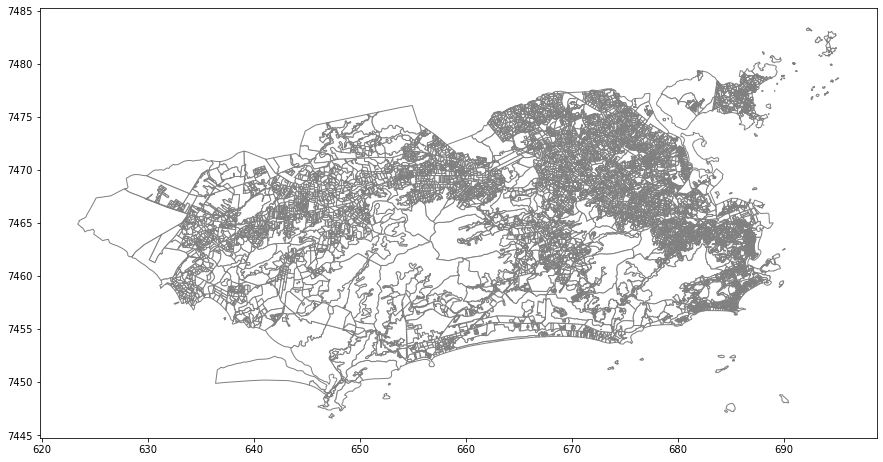

In [3]:
setor.plot(color='white', edgecolor = 'grey', figsize=(15,8))

In [4]:
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,410890,330455705330018,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.99,593.56,110532.97,681.79,66510.55,412.08,147976.22,658.21,74104.40,"POLYGON ((679.387 7456.374, 679.401 7456.395, ..."
1,410891,330455705330019,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.88,378.27,209230.61,745.78,138022.78,431.95,242995.28,749.76,183389.25,"POLYGON ((679.459 7456.356, 679.457 7456.359, ..."
2,410892,330455705330020,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.30,705.05,121767.60,757.04,91320.62,532.05,143295.24,701.27,70130.28,"POLYGON ((679.554 7456.388, 679.556 7456.391, ..."
3,410946,330455705330064,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.69,686.60,214740.09,805.31,155993.62,483.81,239318.45,779.22,155061.31,"POLYGON ((679.976 7456.897, 679.977 7456.899, ..."
4,410893,330455705330021,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.03,621.94,274726.99,731.99,242650.09,491.83,238726.75,720.79,184712.52,"POLYGON ((679.550 7456.471, 679.554 7456.460, ..."


In [7]:
# Alterando o tipo de crs
setor = setor.to_crs({'init' : 'epsg:4326'})

# Selecionando os bairros e 'geometrias'
setor_m = setor[['NM_BAIRRO', 'geometry']]

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
# Agregando por bairro
bairro = setor_m.dissolve(by='NM_BAIRRO')

In [9]:
bairro

,geometry
NM_BAIRRO,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8..."
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8..."
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9..."
Anchieta,"POLYGON ((-43.41112 -22.83336, -43.41115 -22.8..."
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9..."
...,...
Vila Valqueire,"POLYGON ((-43.36722 -22.89664, -43.36718 -22.8..."
Vila da Penha,"POLYGON ((-43.30720 -22.84905, -43.30738 -22.8..."
Vista Alegre,"POLYGON ((-43.30903 -22.83303, -43.30909 -22.8..."


<AxesSubplot:>

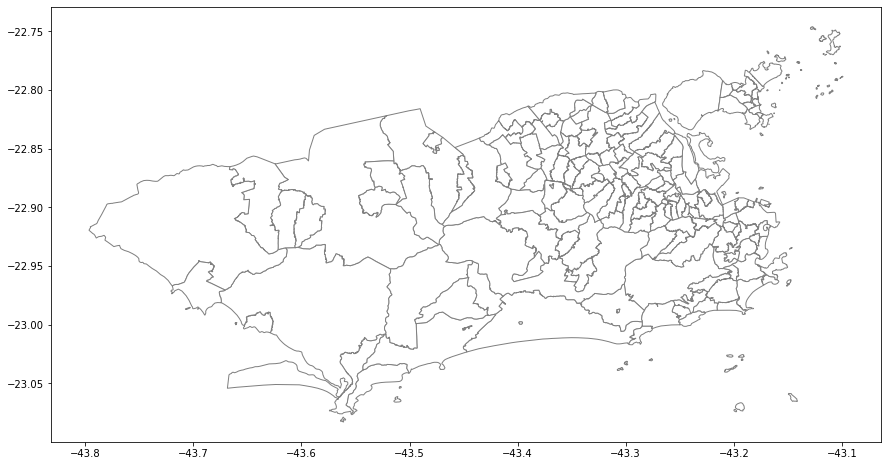

In [10]:
bairro.plot(color='white', edgecolor = 'grey', figsize=(15,8))

In [11]:
# Selecionando os bairros,'geometrias' e a variavel de populacao
setor_m = setor[['NM_BAIRRO', 'geometry', 'V002']]

# Agregando por bairro e somando a qt
bairro = setor_m.dissolve(by='NM_BAIRRO', aggfunc='sum')

In [12]:
bairro

,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8...",11356.0
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8...",26967.0
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9...",9189.0
Anchieta,"POLYGON ((-43.41112 -22.83336, -43.41115 -22.8...",55634.0
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9...",39325.0
...,...,...
Vila Valqueire,"POLYGON ((-43.36722 -22.89664, -43.36718 -22.8...",32232.0
Vila da Penha,"POLYGON ((-43.30720 -22.84905, -43.30738 -22.8...",25462.0
Vista Alegre,"POLYGON ((-43.30903 -22.83303, -43.30909 -22.8...",8622.0


In [13]:
# Verificando se está correto
print(setor_m['V002'].sum())
print(bairro['V002'].sum())

6283486.0
6283486.0


In [14]:
# retornando para o crs anterior
bairro = bairro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [15]:
#resetando index
bairro.reset_index(inplace=True)

In [18]:
# Salvando arquivo

import os 

dir = '../01.Dados/Mapas/RJ-BAIRRO'
if not os.path.exists(dir):
    os.makedirs(dir)
    
bairro.to_file(dir + '/RJ-BAIRRO.shp')